In [1]:
import sys
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../../")

from mlalgorithms.classification import BinaryLogistic

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=1, random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

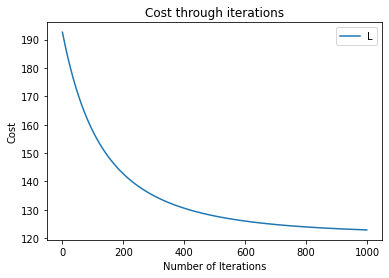

Accuracy: 0.8366666666666667
Logistic Cost: 0.4035389191411705
Coefficients: 
   Feature 1: -0.17791301640154455
   Feature 2: 1.3335482434887216
Intercept: 0.008634629405042874


In [4]:
clf = BinaryLogistic(learning_rate=0.01,n_iters=1000, verbose=1)
clf.fit(X_train, y_train)

In [5]:
clf.confusion_matrix(X_test, y_test)

array([[84., 23.],
       [12., 81.]])

In [6]:
clf.accuracy_score(X_test, y_test)

0.825

In [7]:
x0 = X_test[y_test == 0]
x1 = X_test[y_test == 1]

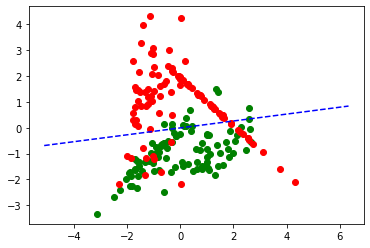

In [8]:
t = (x0, x1)
colors = ('green', 'red')

for x, c in zip(t, colors):
    if c == 'green':
        plt.scatter(x[:,0], x[:,1], c=c, label='0')
    else:
        plt.scatter(x[:,0], x[:,1], c=c, label='1')

plot_x = np.array([min(X_test[:,0]) - 2, max(X_test[:,0]) + 2])

plot_y = (-1/clf.coeff_[2]) * (clf.coeff_[1] * plot_x + clf.coeff_[0])

plt.plot(plot_x, plot_y, 'b--')
plt.show()